In [1]:
import dagshub
dagshub.init(repo_owner='2675781', repo_name='ProjetIA_mlflow_dagshub_2025', mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Accessing as 2675781

Initialized MLflow to track repo "2675781/ProjetIA_mlflow_dagshub_2025"

Repository 2675781/ProjetIA_mlflow_dagshub_2025 initialized!

🏃 View run peaceful-fowl-710 at: https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow/#/experiments/0/runs/b3bc50c4afce4946b1accaa8414a1e14
🧪 View experiment at: https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow/#/experiments/0


In [2]:
# Cette ligne execute "import mlflow" et s'assure s'il est dans l'environement séléctionné 
import sys
import mlflow.sklearn
# Affiche le chemin complet de l’exécutable Python utilisé actuellement.
print("Python exec  :", sys.executable)

# Affiche la liste des dossiers contenant les bibliothèques installées dans ton environnement.
print("Site-packages:", [p for p in sys.path if "site-packages" in p])

# Ce bloc essaie d’importer MLflow pour confirmer qu’il est bien disponible.
try:
    # Si l’import réussit → il affiche la version installée.
    import mlflow
    print("mlflow ok   :", mlflow.__version__)

# Si ça échoue → il affiche l’erreur complète, utile pour le débogage
except Exception as e:
    print("Import ERROR:", repr(e))

Python exec  : c:\Users\danie\projet_IA\Scripts\python.exe
Site-packages: ['c:\\Users\\danie\\projet_IA\\lib\\site-packages', 'c:\\Users\\danie\\projet_IA\\lib\\site-packages\\win32', 'c:\\Users\\danie\\projet_IA\\lib\\site-packages\\win32\\lib', 'c:\\Users\\danie\\projet_IA\\lib\\site-packages\\Pythonwin']
mlflow ok   : 3.1.4


In [3]:
#Importation des module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

# Assure-toi que student-por.csv est dans le meme dossier que le notebook
df= pd.read_csv("student-por.csv")
df.head(10)
print("shape:", df.shape)
print("colonnes:", list(df.columns))

shape: (649, 33)
colonnes: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [4]:
# dictionnaire des données
dict = pd.read_csv("dictionnaire_donnees.csv", delimiter=';')
dict

,Variables,Type,Description,Valeurs attendu
0,School,Catégoriel,Établissement fréquenter par l’étudiant,"‘GP’, ‘MS’"
1,Sex,Catégoriel,Sexe de l’étudiant,"‘F’, ‘M’"
2,Age,Numérique,Âge de l’étudiant,"‘18’, ‘17’, ‘15’, ‘16’, ’19’, etc."
3,Address,Catégoriel,L’adresse de l’étudiant en zone urbain ou rural,"‘U’ – urban, ‘R’ - rural"
4,G1,Numérique,Note sommatif premier examen,"‘10’, ‘19’, ‘11’, ‘13’, ‘14’, etc."
5,G2,Numérique,Note sommatif second examen,"‘13’, ‘12’, ‘10’, etc."
6,G3,Numérique,Note finale de l’étudiant,"‘11’, ‘14’, ‘16’, etc."
7,Absences,Numérique,Nombre d’absence de chaque étudiant à un cours,"‘6’, ‘2’, ‘8’, etc."
8,Health,Numérique,Statue de la santé de chaque étudiant (5 excel...,"‘5’, ‘4’, ‘3’, ‘2’, ‘1’"
9,Walc,Numérique,Consommation d’alcool durant la fin de semaine,"1, 5, etc"


1. Chargement et exploration des données

In [5]:
df['Medu'].value_counts()

Medu
2    186
4    175
1    143
3    139
0      6
Name: count, dtype: int64

In [6]:
df.shape

(649, 33)

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel f

Ce jeu de donnée contient 649 étudiants et 33 colonnes de variables de données

In [9]:
df['failures'].dtypes

dtype('int64')

2. Prétraitement (encodage, nettoyage, normalisation)

Nettoyage des données

In [10]:
#Vérifie s'il y a des données manquantes
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Il n'y a aucune valeur manquantes

In [11]:
# Vérifiez pour des données dupliquées
df.duplicated().sum()
# Il n'y a aucunes valeurs dupliquées

np.int64(0)

In [12]:
#Sélection des colonnes avec valeurs catégorielles
categ_cols = df.select_dtypes(include=["object", "category"])
categ_cols

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [13]:
#Sélection des colonnes avec valeurs numériques
num_cols = df.select_dtypes(include=["number"])
num_cols

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


In [14]:
# Variable cible à partir de 'G3' pour la réussite et l'échec pour la classification
df['success'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

In [15]:
df['success'].value_counts()

success
1    549
0    100
Name: count, dtype: int64

Il y a un déséquilibre dans la nouvelle colonne 'success'

J'ai choisi l'encodage ordinale pour la colonne 'famsize', car les données sont ordonnées.

In [16]:
# Encodage Ordinal
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})

# 0 = LE3
# 1 = GT3

J'ai choisi l'encodage one-hot encoding pour les colonnes tel que : 'school', 'romantic', 'nursery', car les données de chacunes de ces colonnes sont non-ordonnées et elles n'ont pas beaucoup de valeurs uniques.

In [17]:
# One-hot encoding
onehot_cols = ['school', 'romantic', 'internet', 'nursery', 'activities', 'higher', 'paid', 'famsup', 'schoolsup', 'Pstatus', 'sex', 'address', 'reason', 'guardian']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=False, dtype=int)

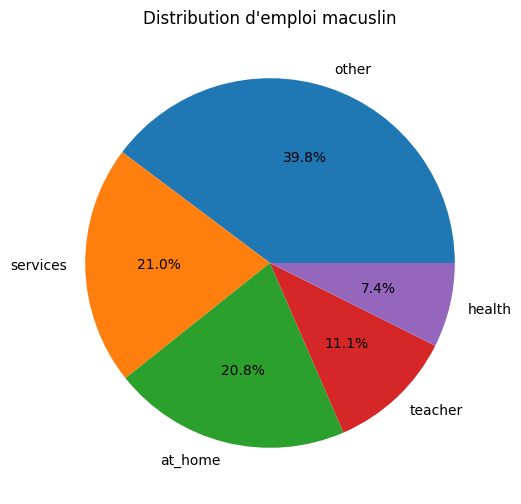

In [18]:
# Diagramme circulaire pour la distribution de type d'emploi pour homme
compte = df['Mjob'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(compte.values, labels=compte.index, autopct='%1.1f%%')
plt.title("Distribution d'emploi macuslin")
plt.show()

3. Split train/test et transformation post-split

In [19]:
from sklearn.model_selection import train_test_split

y = df["success"]
X = df.drop(columns=["success", "G3"]) # On retire G3 pour éviter la fuite des données

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Les transformation (encodage cible) sont désormais appliquées après la split pour éviter toute fuite d'information

J'ai choisi l'encodage de cible pour les colonnes 'Mjob' et 'Fjob', car elles ont beaucoup de valeurs uniques.

In [20]:
# Encodage cible des colonnes Mjob et Fjob sur X_train et X_test pour éviter d'introduire des données qu'il ne devrait pas connaitre
for col in ['Mjob', 'Fjob']:
    mean_map = pd.concat([X_train[col], y_train], axis=1).groupby(col)['success'].mean()
    X_train[col] = X_train[col].map(mean_map)
    X_test[col] = X_test[col].map(mean_map).fillna(mean_map.mean())

In [21]:
df['Mjob']

0       at_home
1       at_home
2       at_home
3        health
4         other
         ...   
644    services
645     teacher
646       other
647    services
648    services
Name: Mjob, Length: 649, dtype: object

In [68]:
X_train.columns

Index(['age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime',
       'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'school_GP', 'school_MS',
       'romantic_no', 'romantic_yes', 'internet_no', 'internet_yes',
       'nursery_no', 'nursery_yes', 'activities_no', 'activities_yes',
       'higher_no', 'higher_yes', 'paid_no', 'paid_yes', 'famsup_no',
       'famsup_yes', 'schoolsup_no', 'schoolsup_yes', 'Pstatus_A', 'Pstatus_T',
       'sex_F', 'sex_M', 'address_R', 'address_U', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [ ]:
print(df.dtypes)

age                   int64
famsize               int64
Medu                  int64
Fedu                  int64
Mjob                 object
Fjob                 object
traveltime            int64
studytime             int64
failures              int64
famrel                int64
freetime              int64
goout                 int64
Dalc                  int64
Walc                  int64
health                int64
absences              int64
G1                    int64
G2                    int64
G3                    int64
success               int64
school_GP             int64
school_MS             int64
romantic_no           int64
romantic_yes          int64
internet_no           int64
internet_yes          int64
nursery_no            int64
nursery_yes           int64
activities_no         int64
activities_yes        int64
higher_no             int64
higher_yes            int64
paid_no               int64
paid_yes              int64
famsup_no             int64
famsup_yes          

In [ ]:
df['sex_M']

0      0
1      0
2      0
3      0
4      0
      ..
644    0
645    0
646    0
647    1
648    1
Name: sex_M, Length: 649, dtype: int64

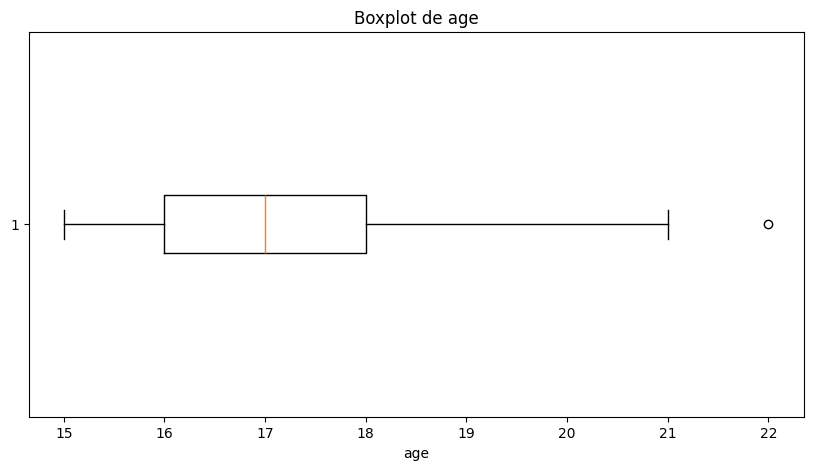

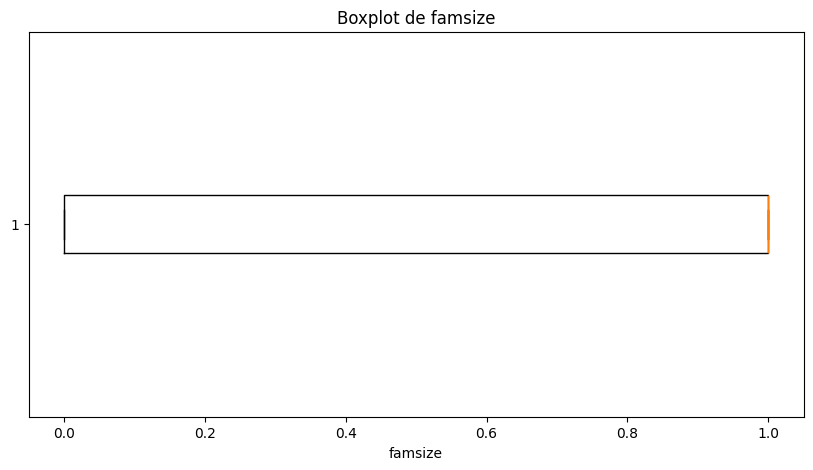

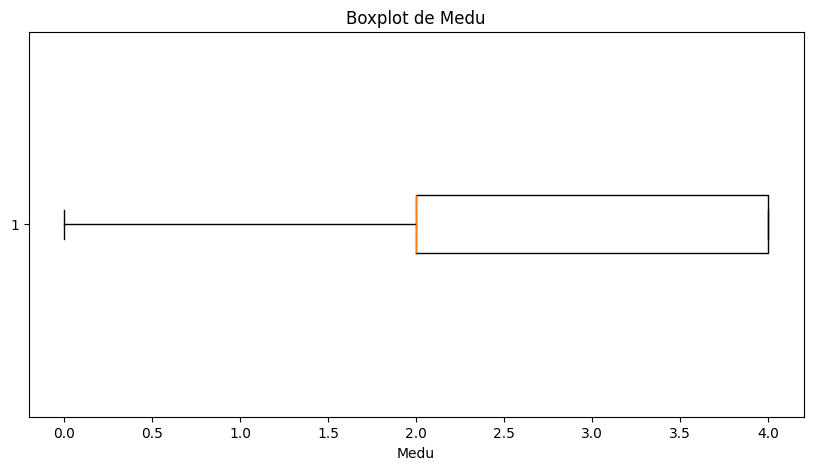

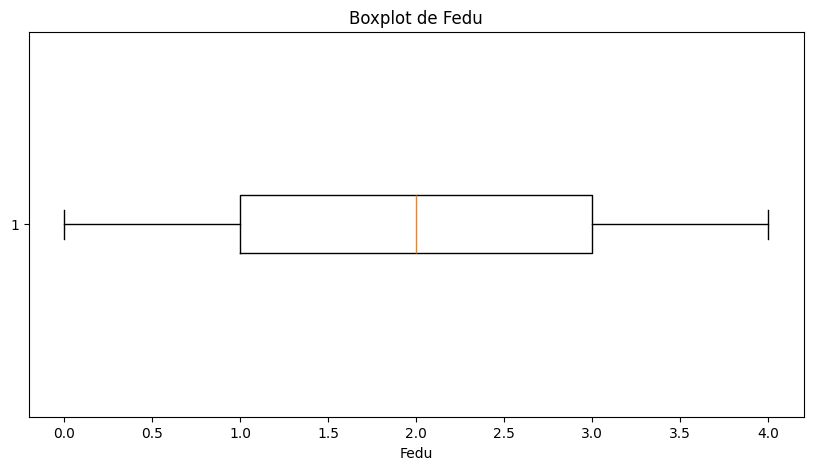

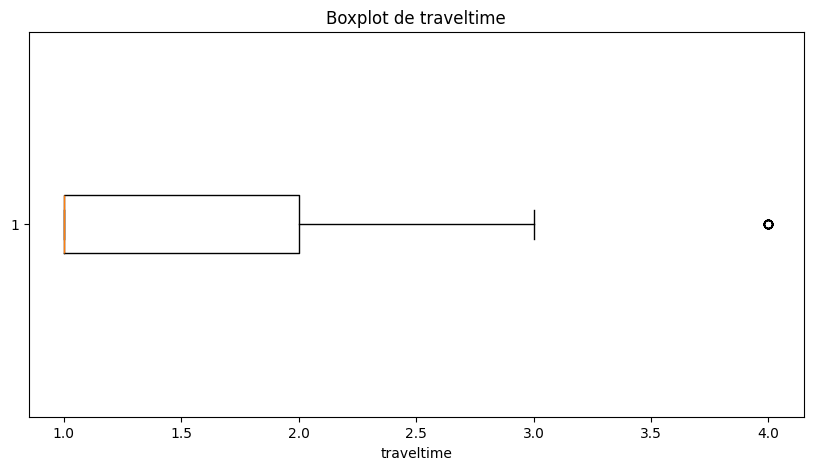

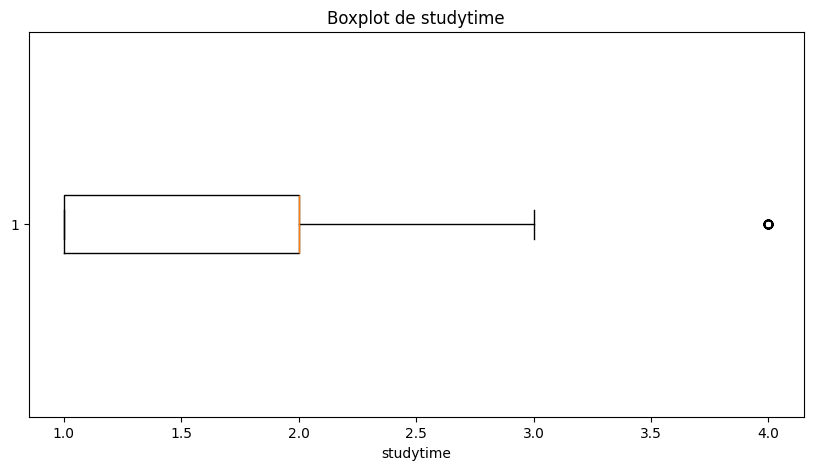

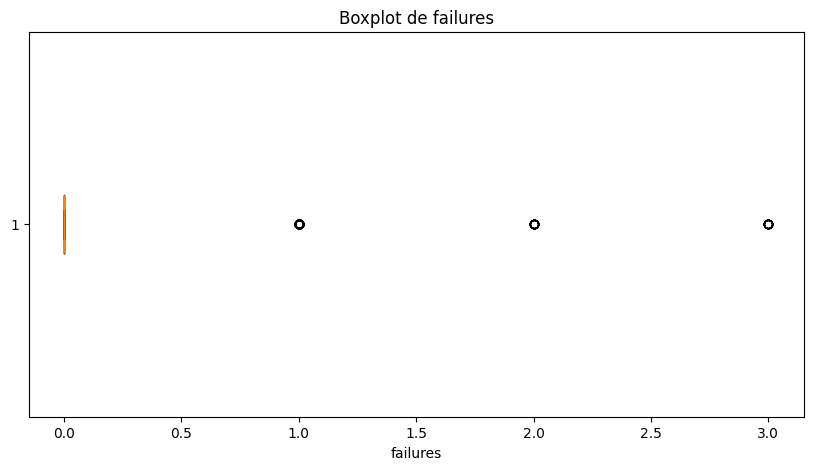

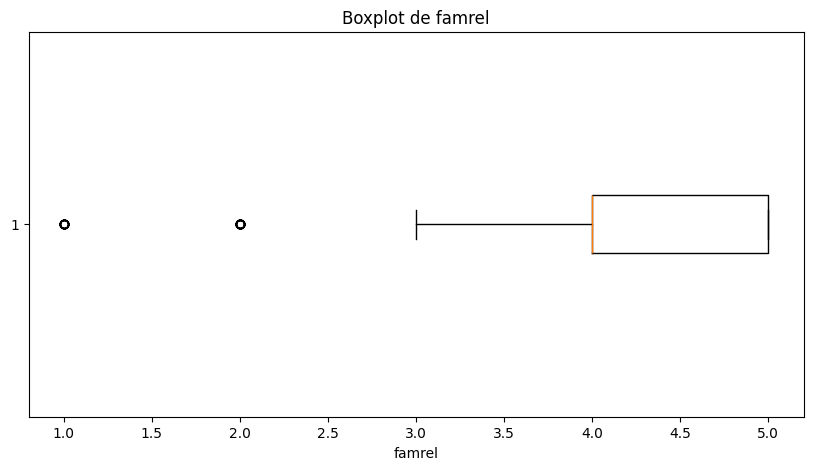

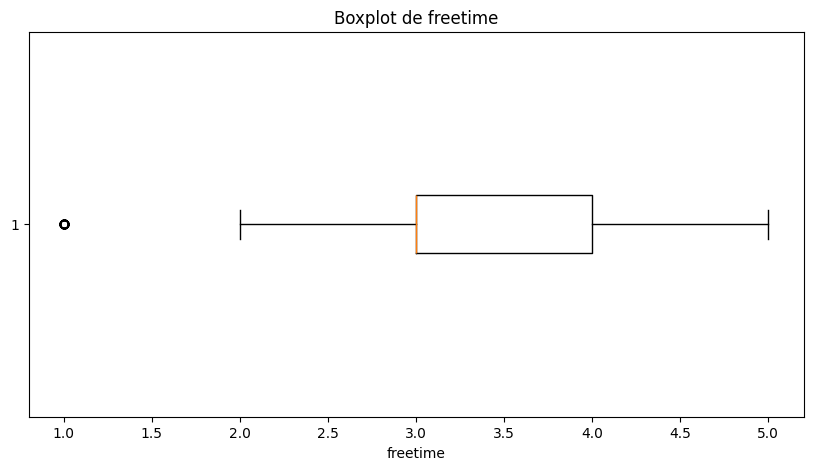

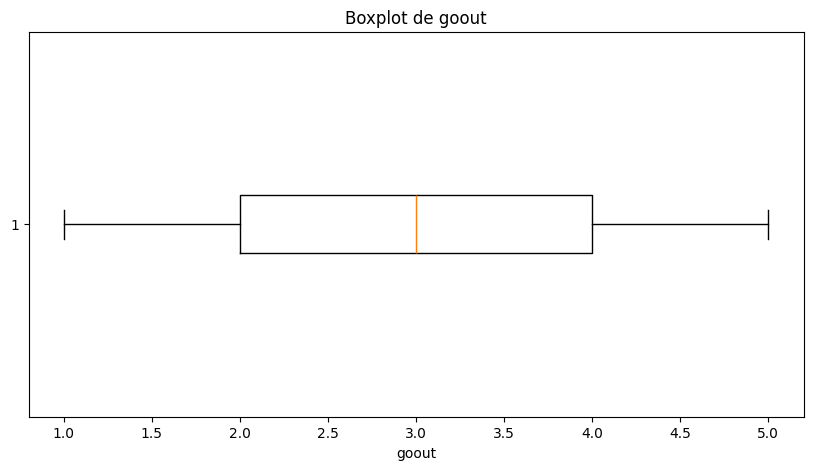

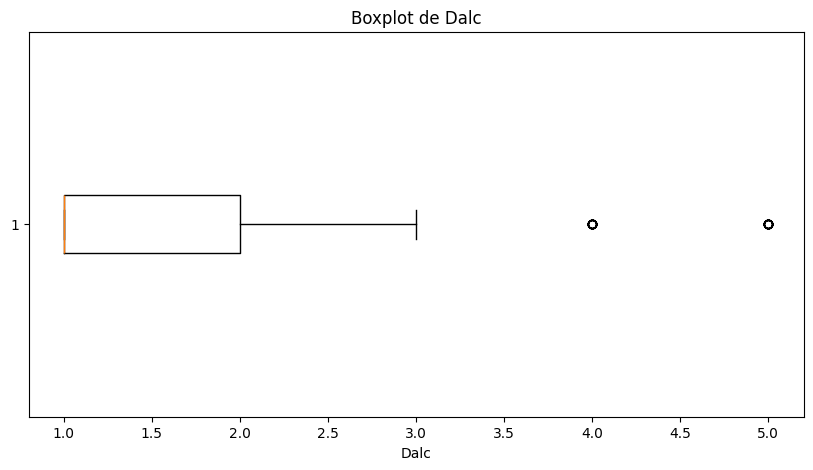

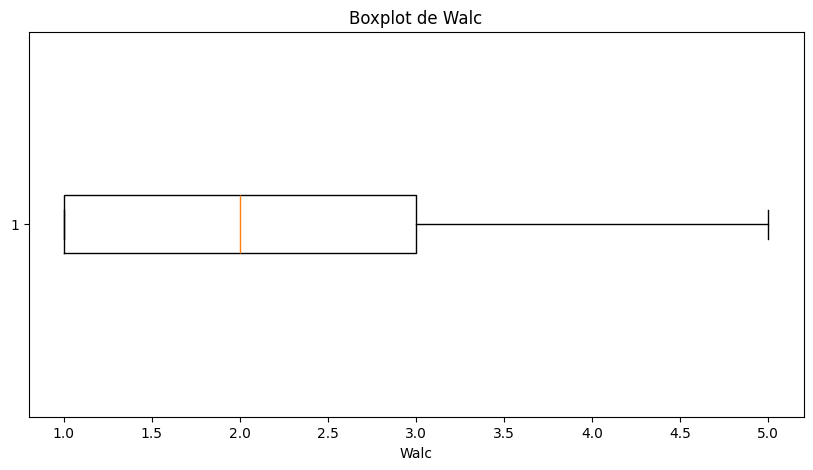

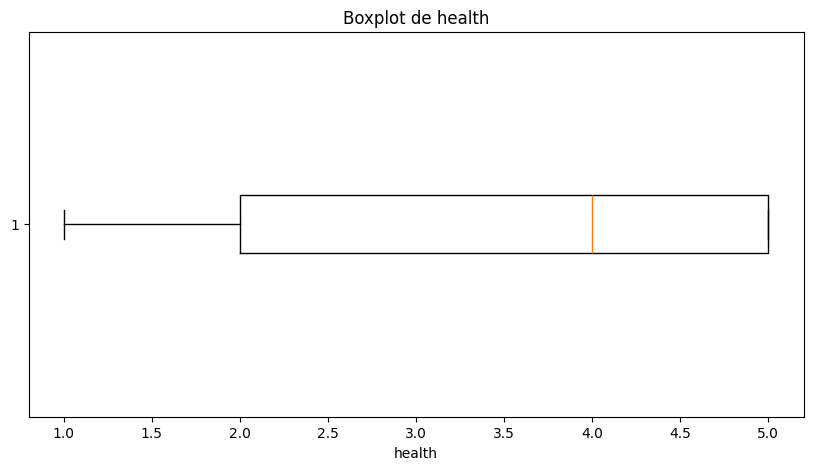

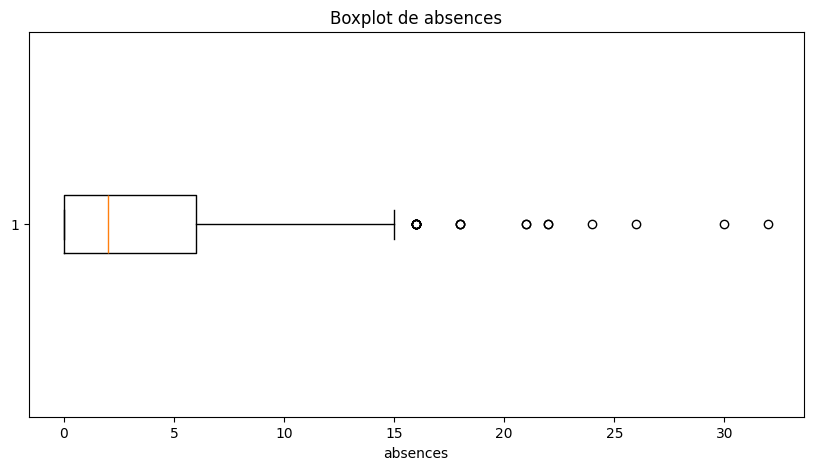

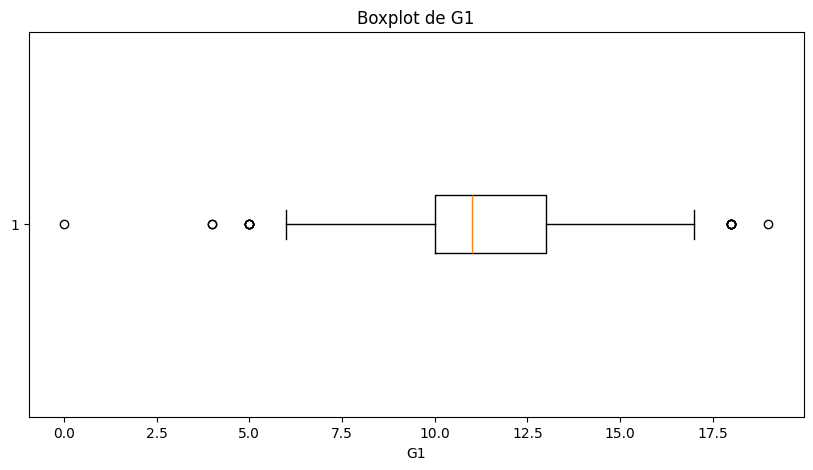

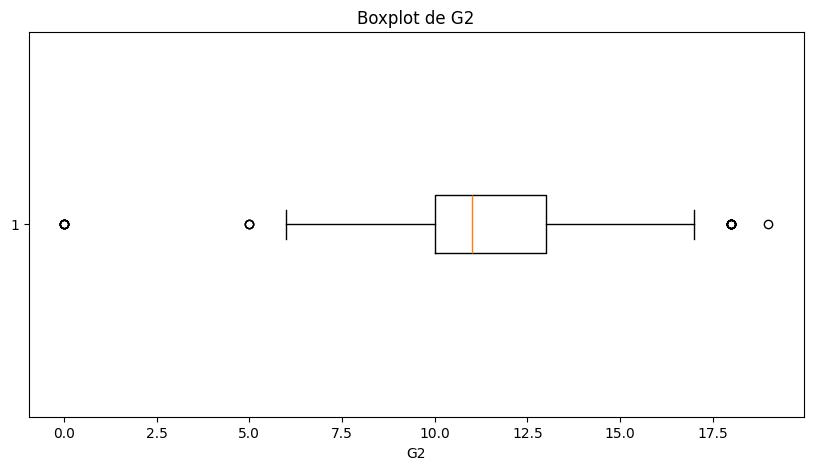

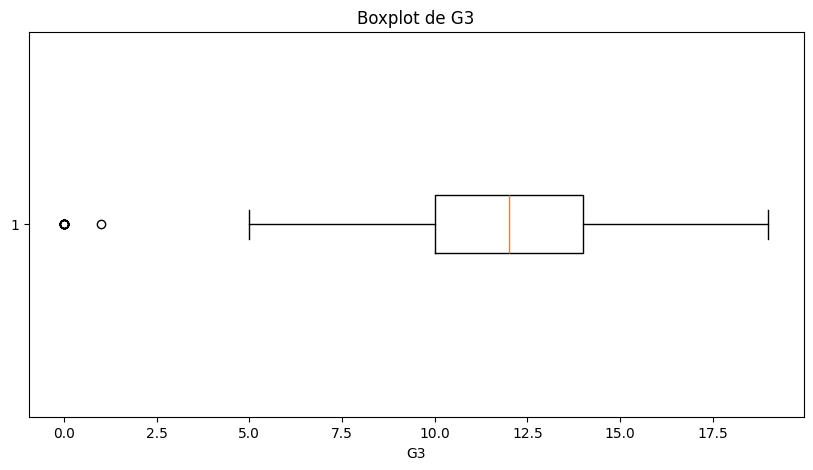

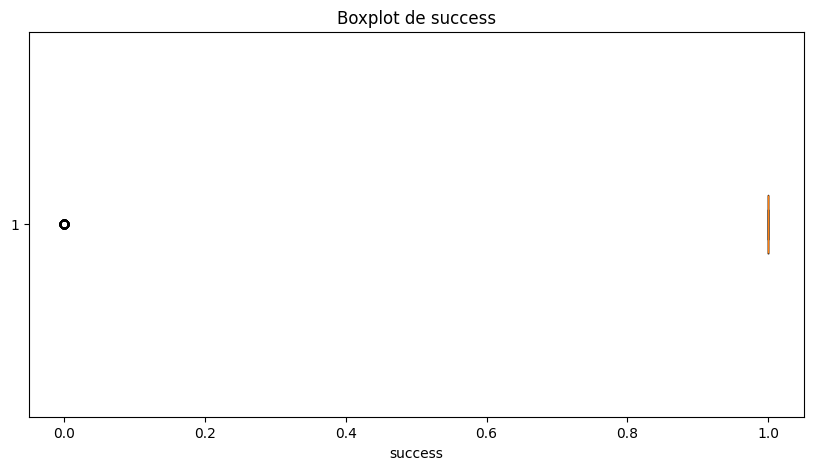

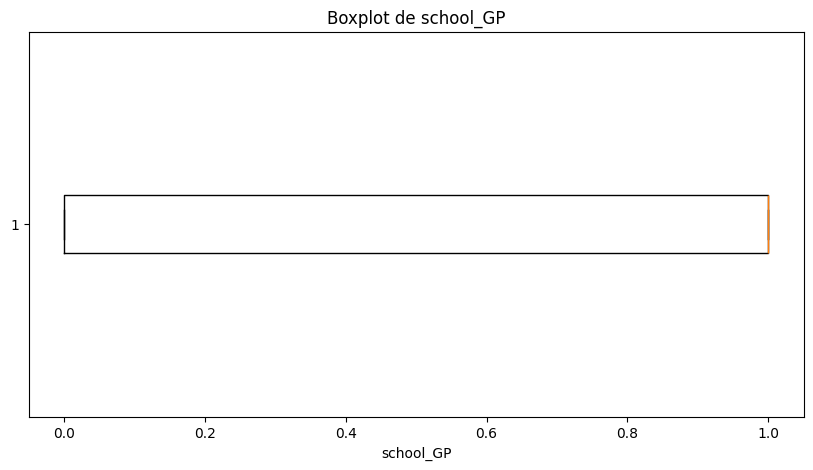

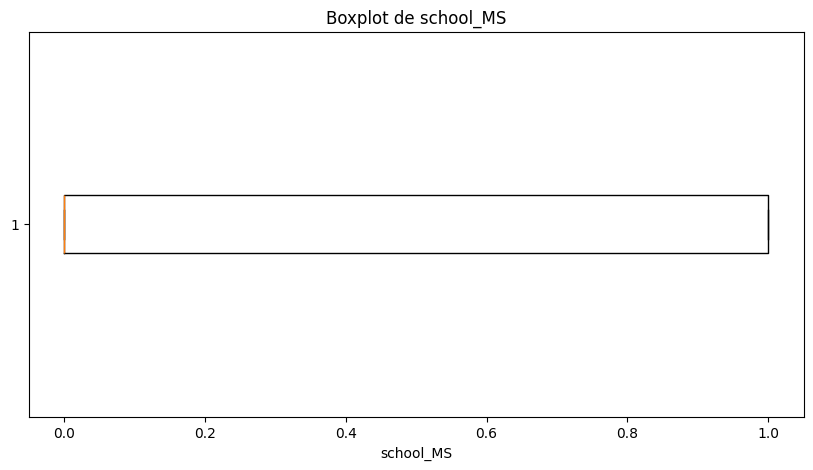

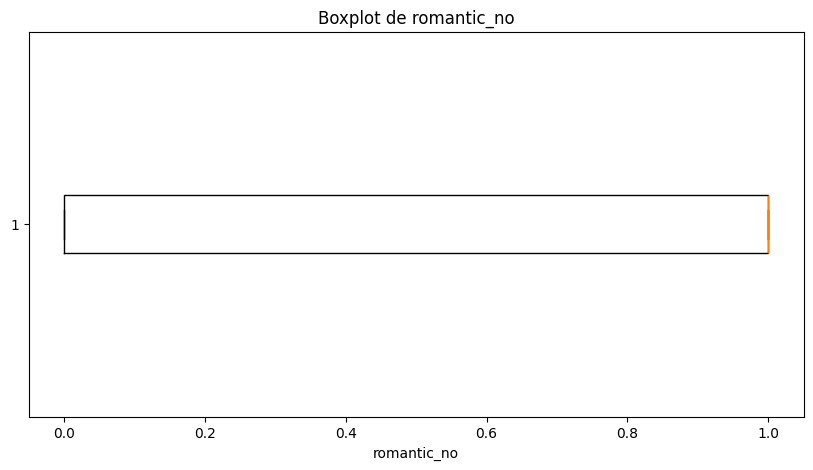

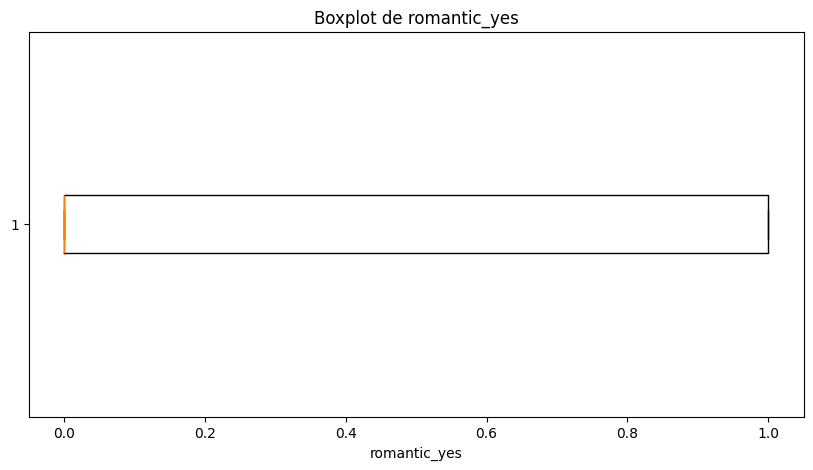

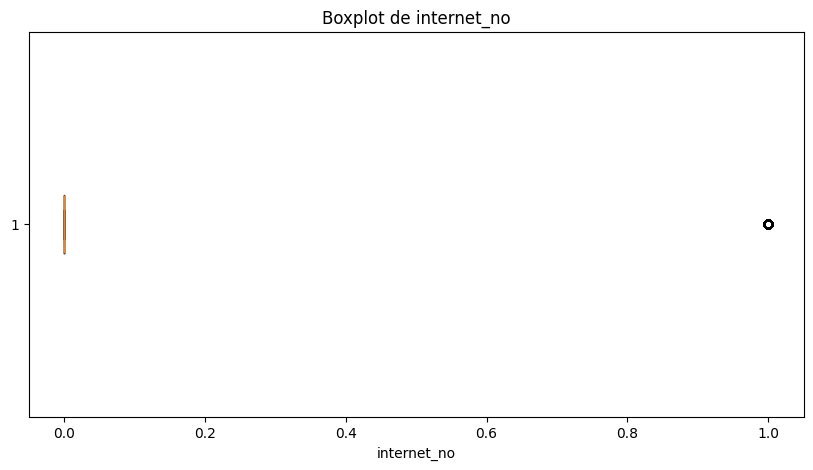

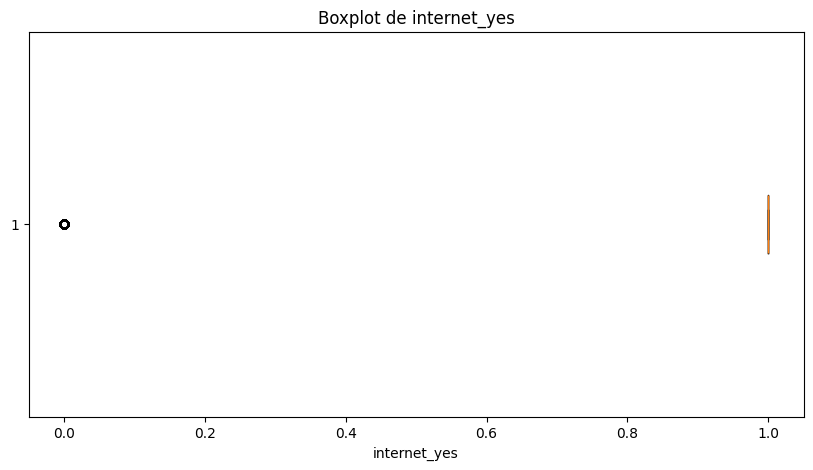

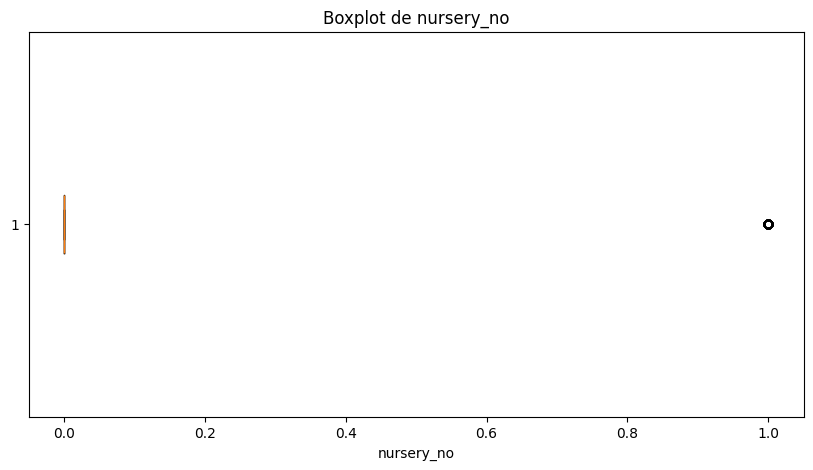

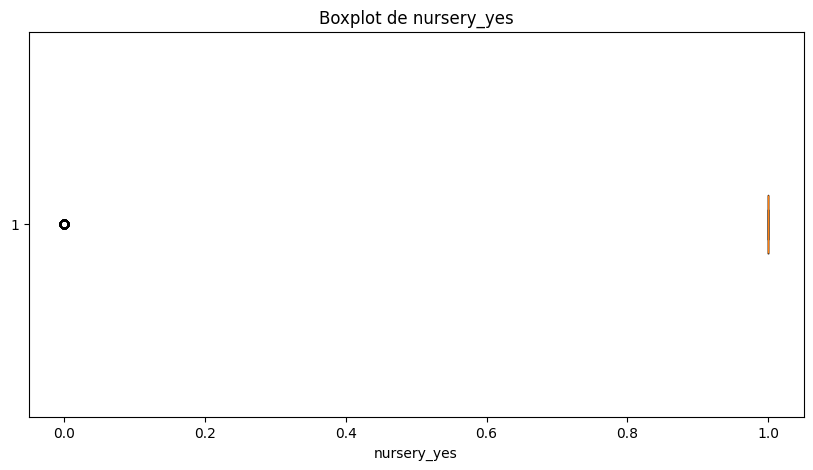

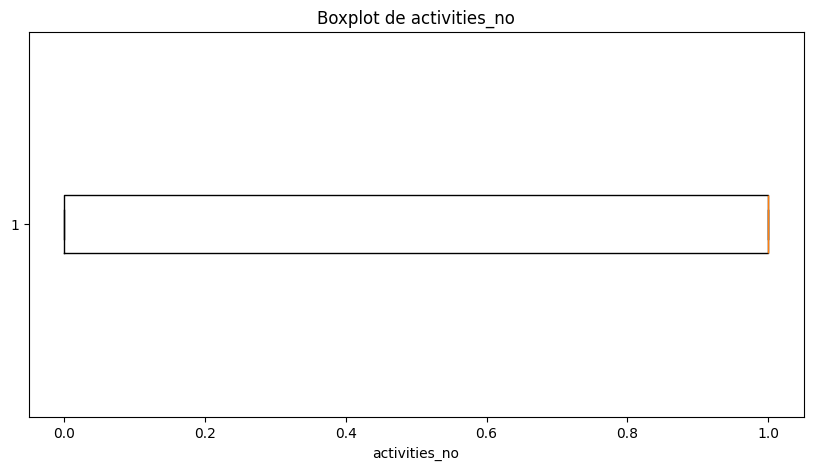

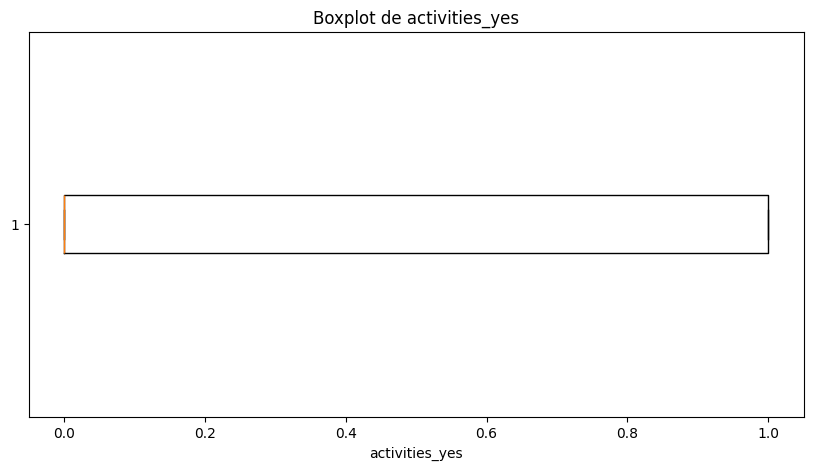

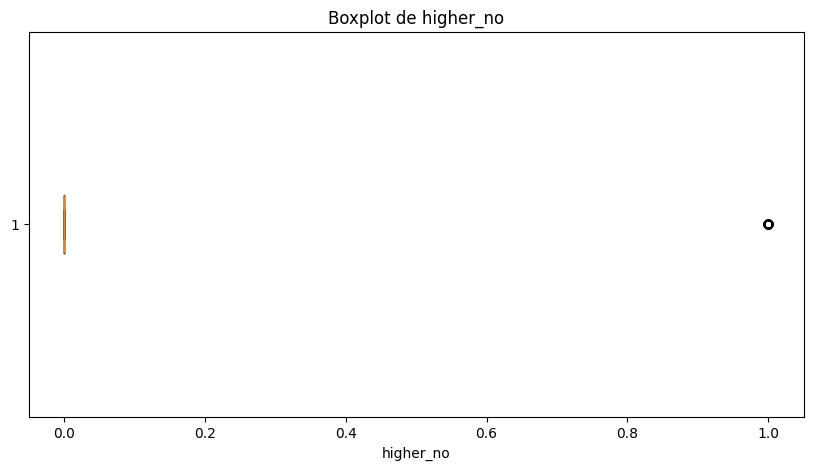

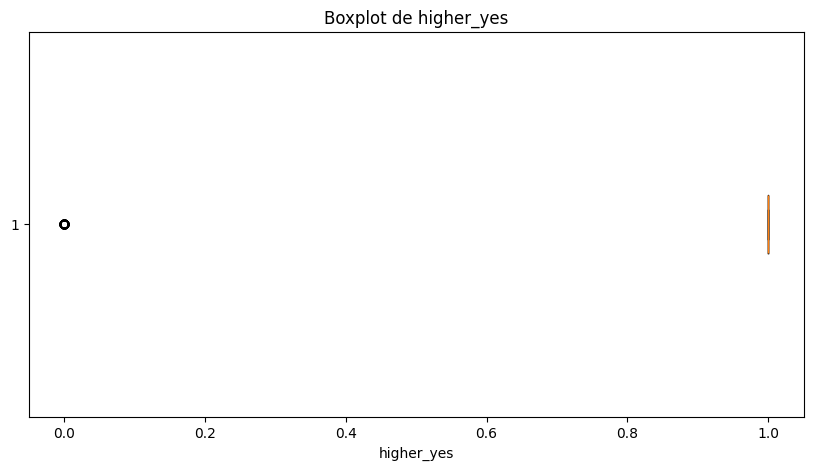

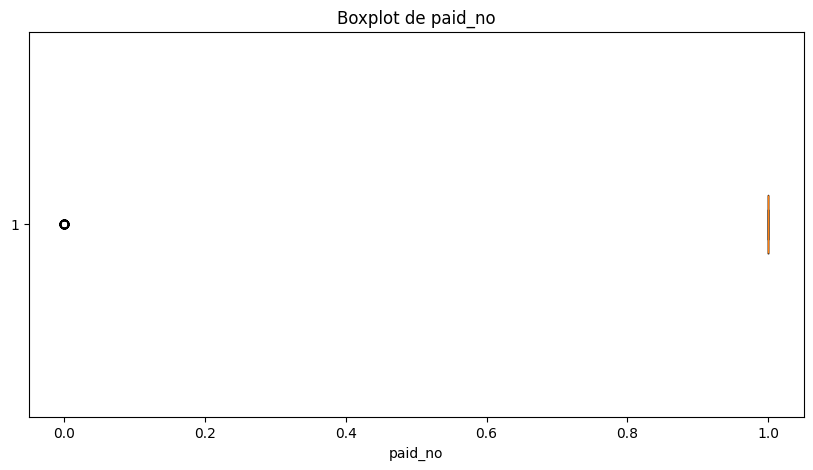

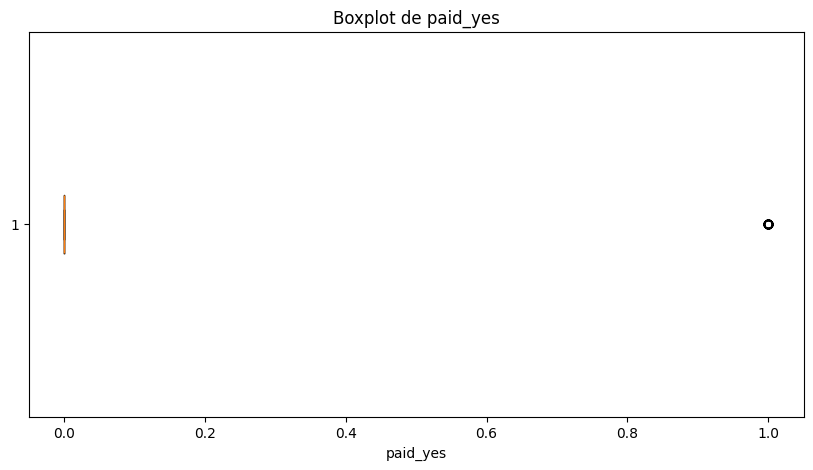

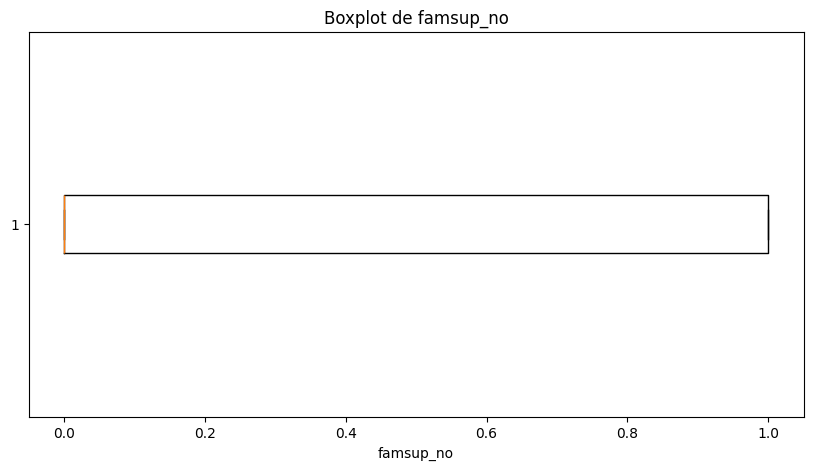

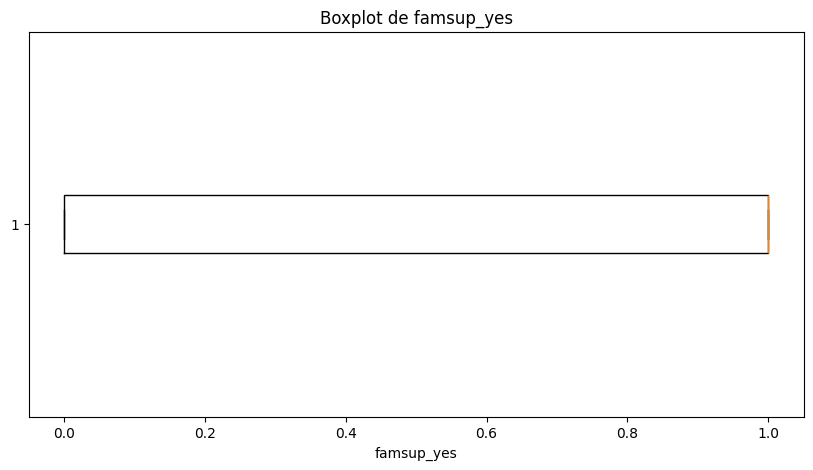

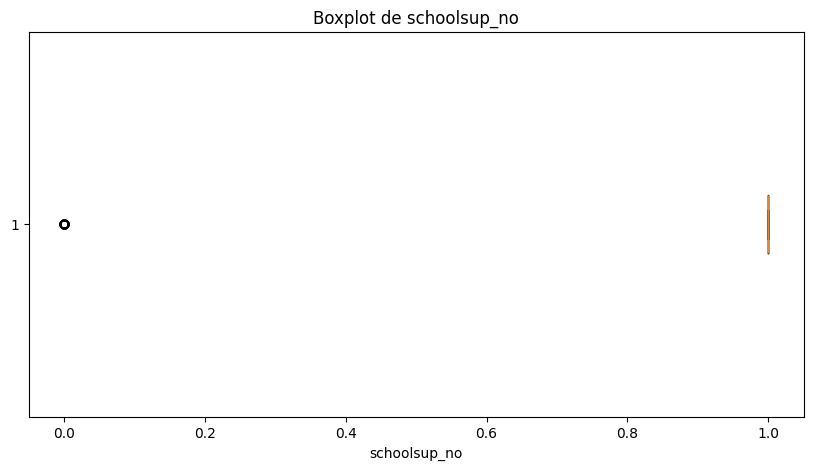

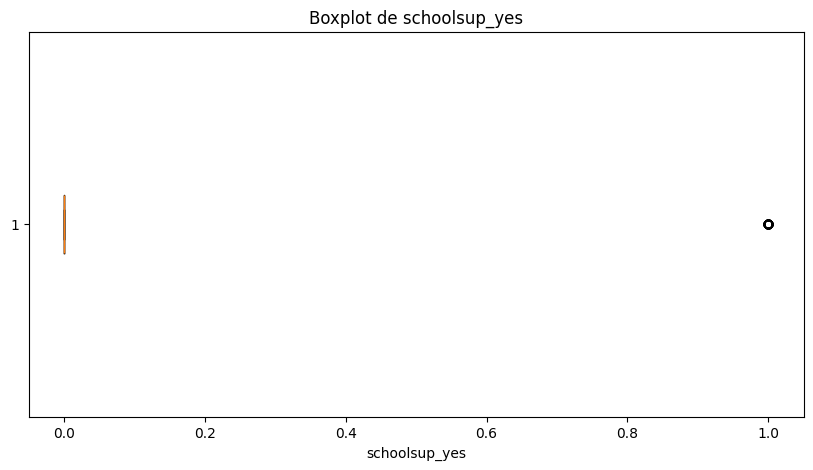

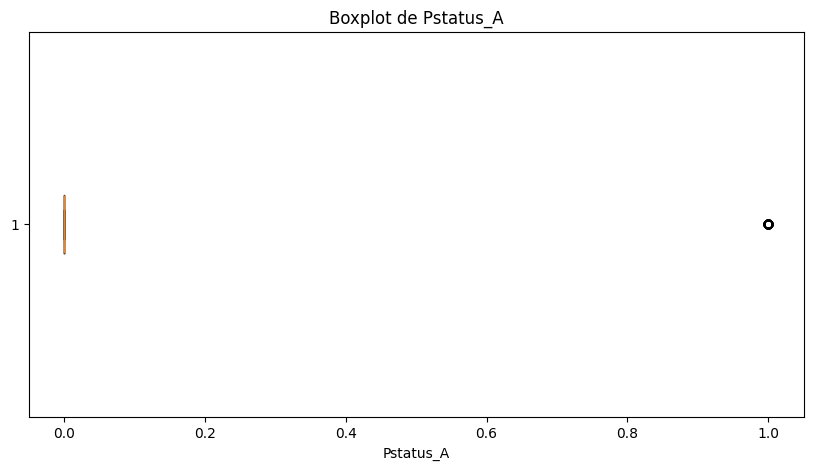

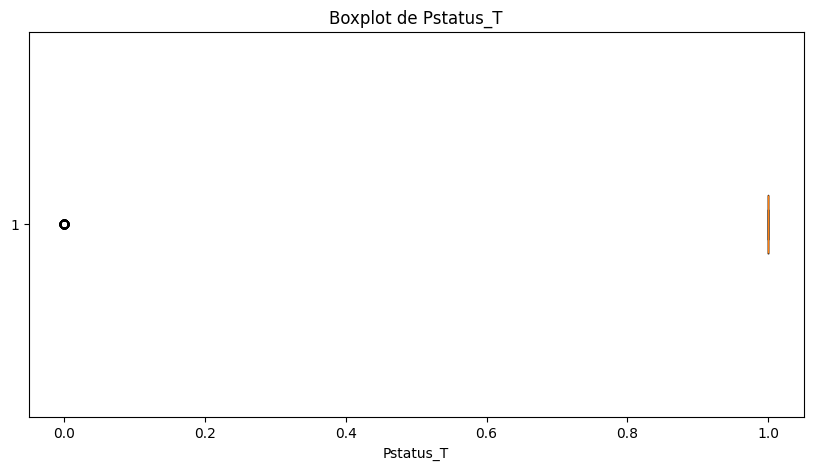

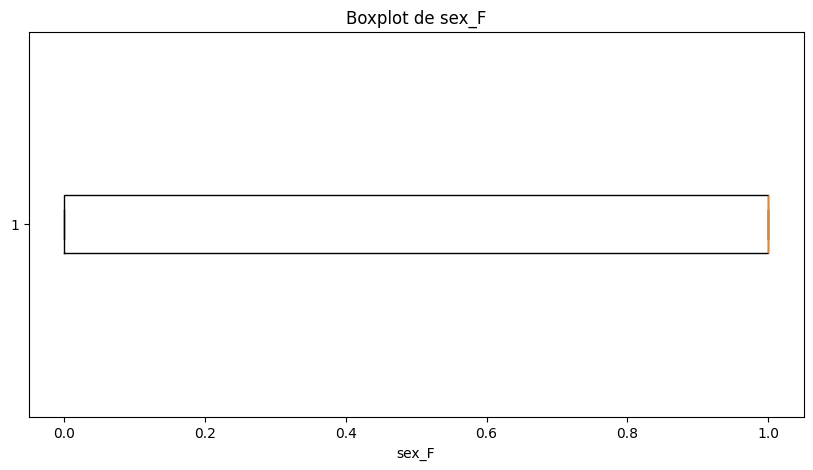

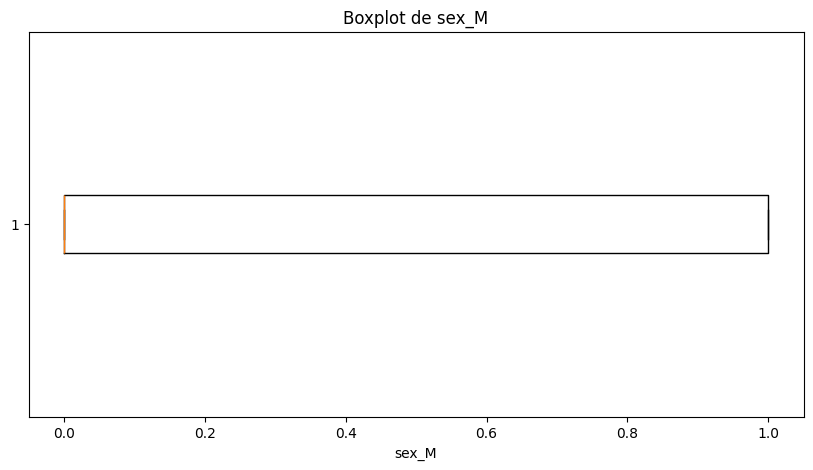

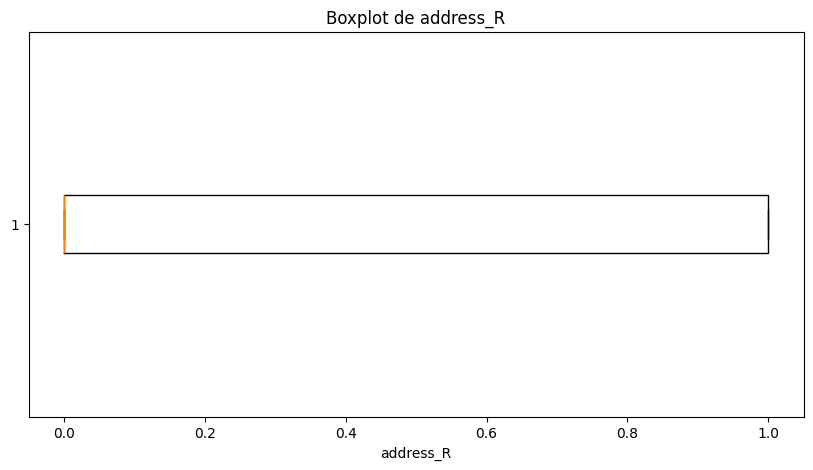

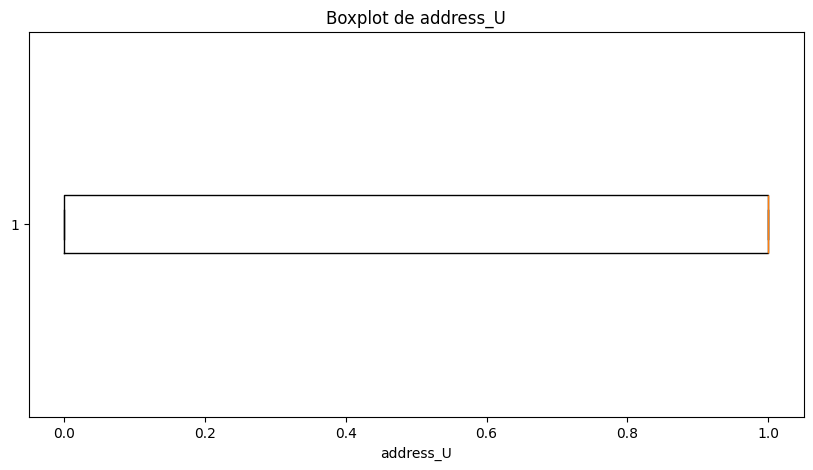

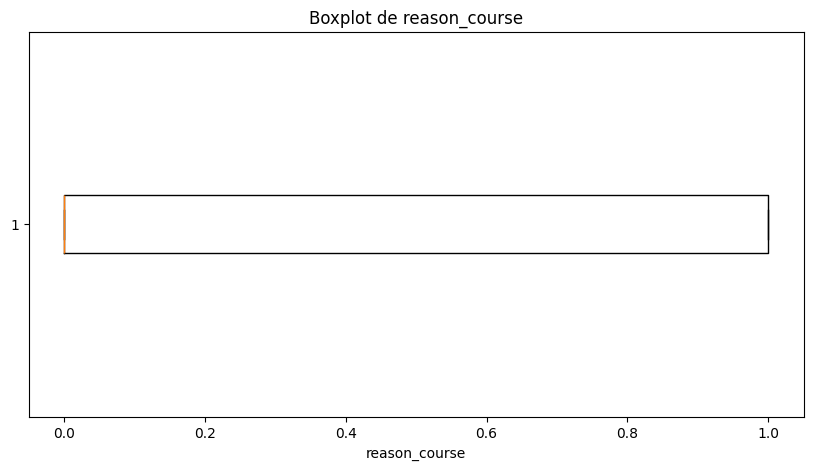

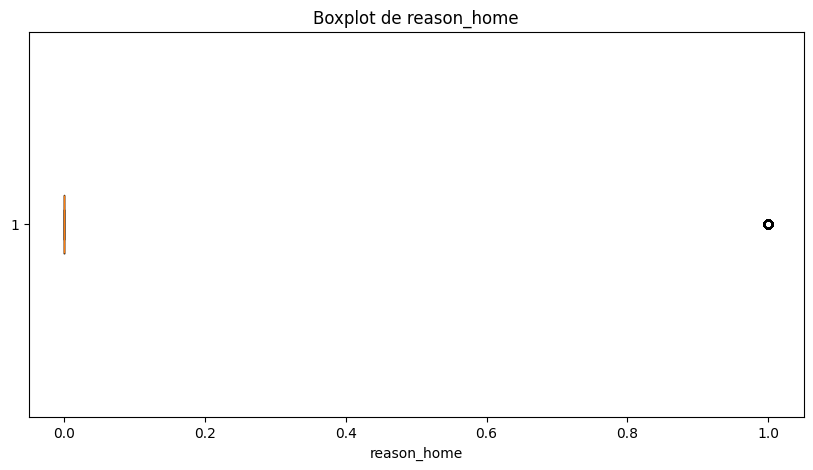

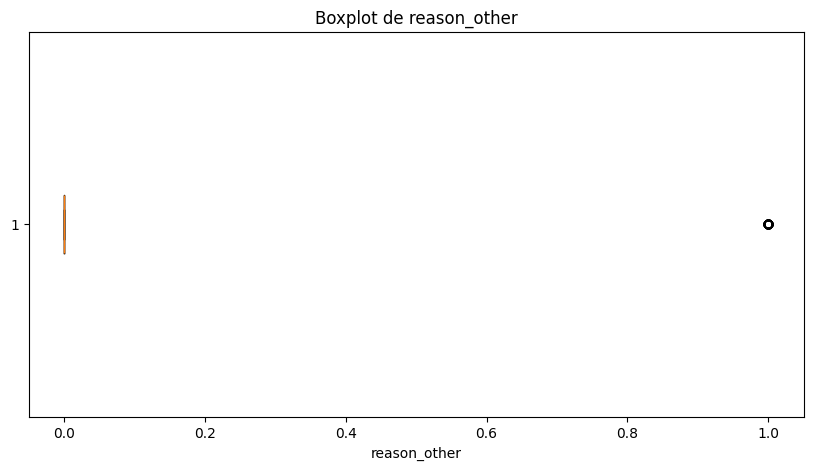

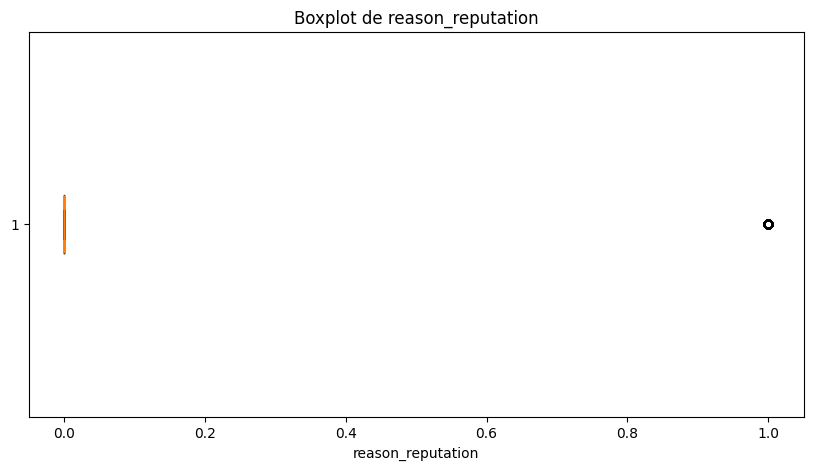

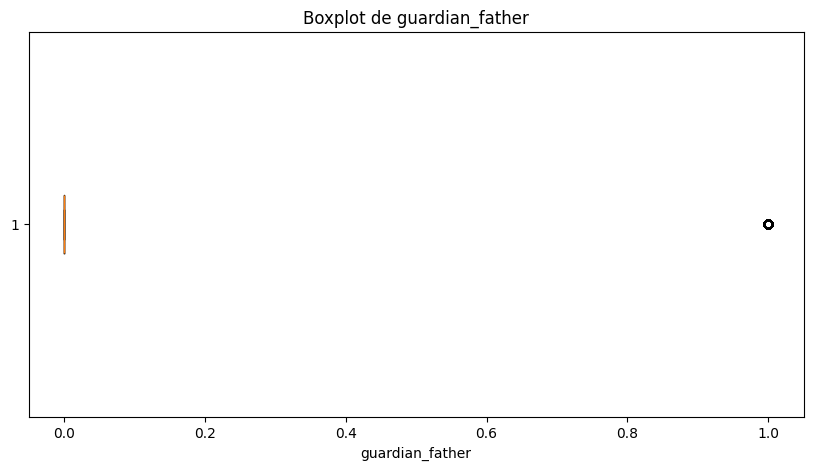

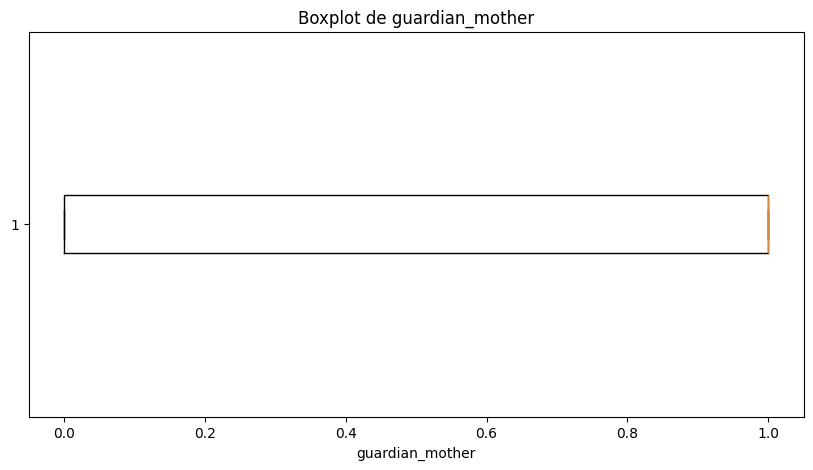

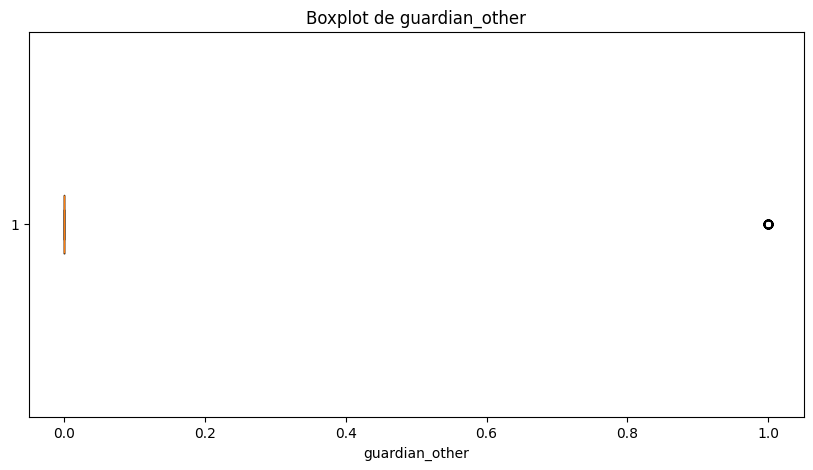

In [ ]:
# Détection des valeurs aberrantes

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(10,5))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(F'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

Il ne semble pas avoir beaucoup de valeurs abérrantes dans chacunes des colonnes, donc ils n'affecteront pas la normalisation et le déployment des modèles.

In [ ]:
#Normalisation sur X_train pour éviter les fuites d'informations
scaler = MinMaxScaler()
num_cols2 = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols2] = scaler.fit_transform(X_train[num_cols2])
X_test[num_cols2] = scaler.transform(X_test[num_cols2]) # Même transformation sur X_test

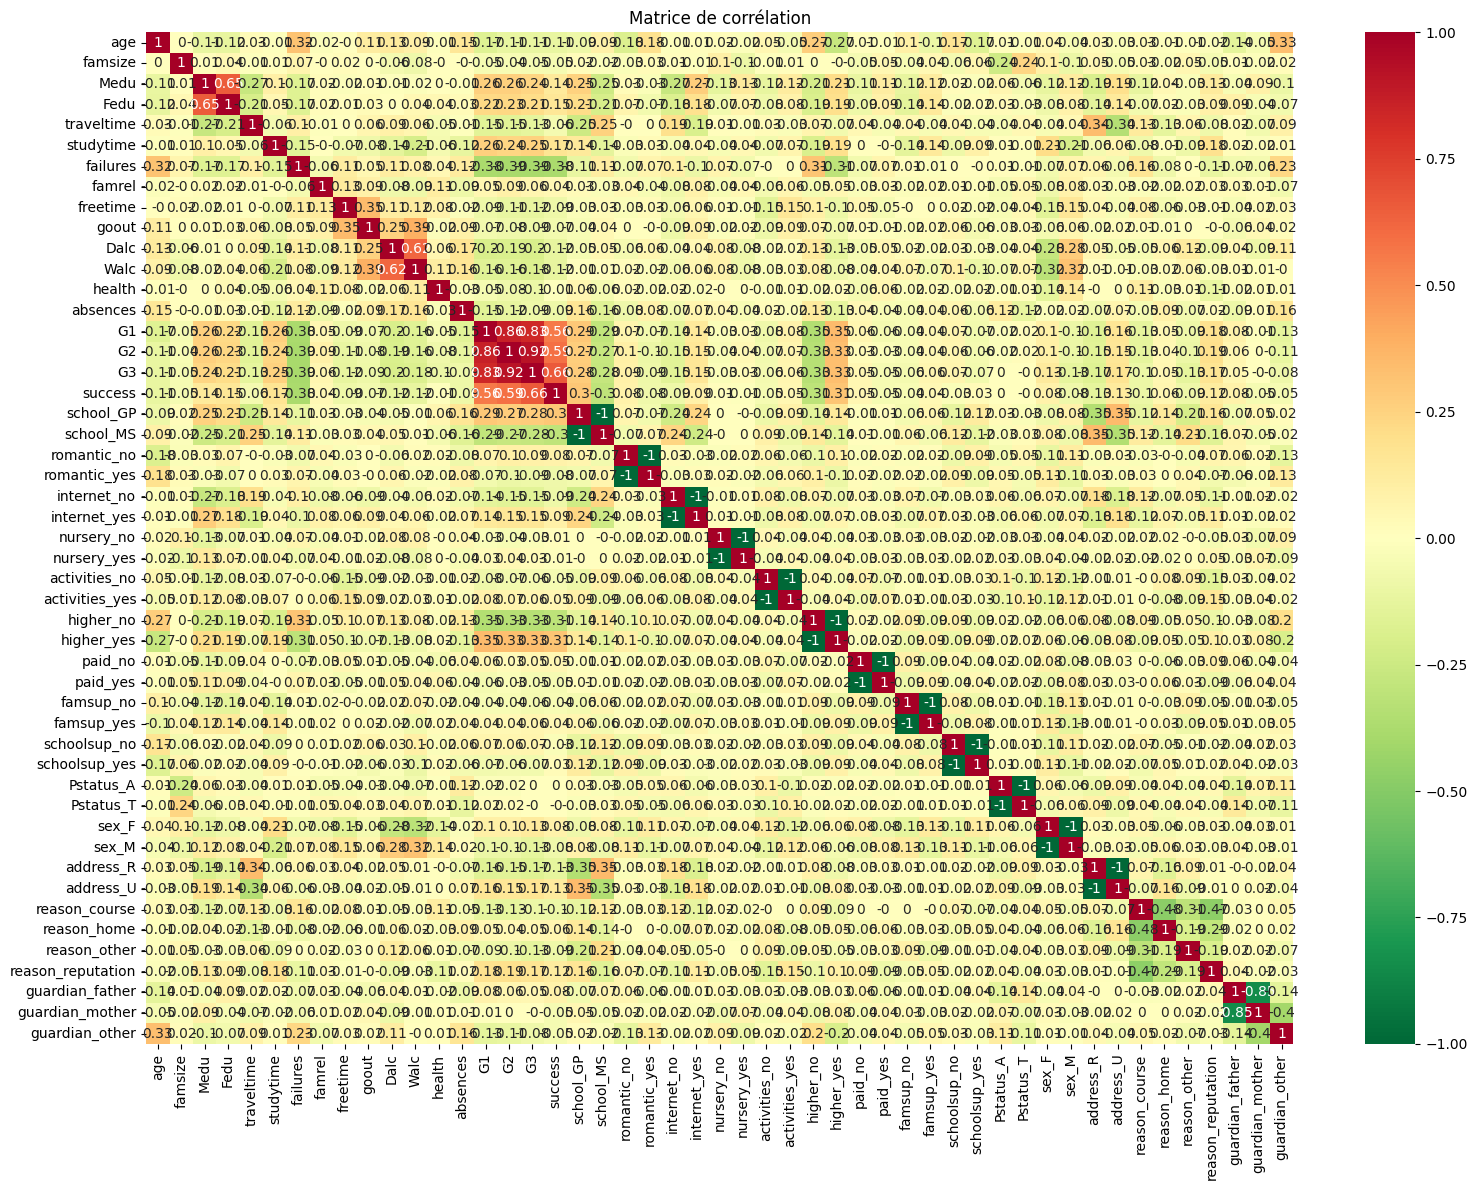

In [ ]:
# matrice de corrélation

num_cols3 = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr = df[num_cols3].corr().round(2)

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='RdYlGn_r', center=0)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

Il y a une très forte corrélation entre les colonne 'G1', 'G2' et 'G3'

In [ ]:
df['G1'].value_counts()

G1
10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: count, dtype: int64

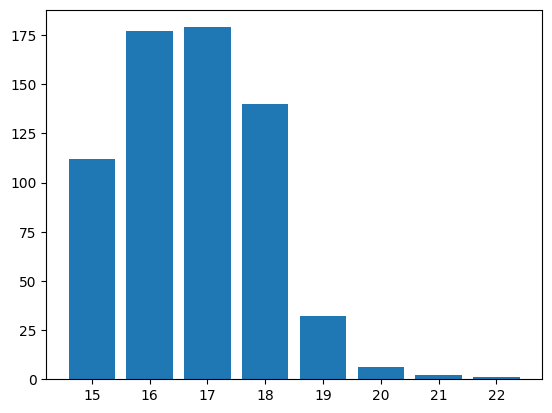

In [ ]:
# Diagramme à bandes des âges

ages_compte = df['age'].value_counts()
plt.bar(ages_compte.index, ages_compte.values)
plt.show()

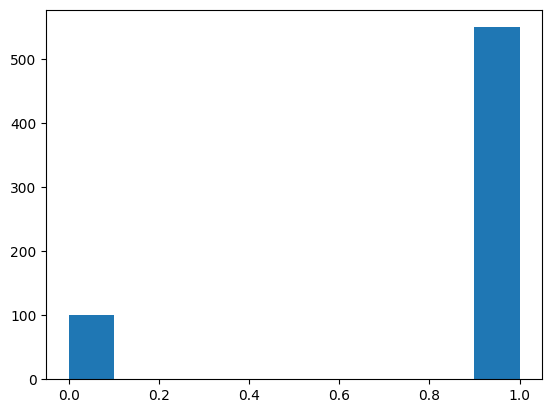

In [ ]:
plt.hist(df['success'], bins=10)
plt.show()

# Il y a plus de succès que d'échec, ce qui signifie qu'il y a une déséquilibre.

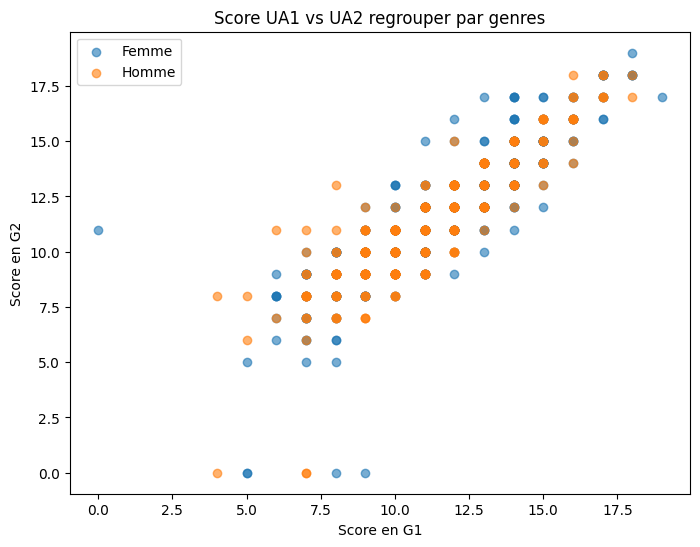

In [ ]:
#Nuage de points : coloré par sex
plt.figure(figsize=(8,6))
plt.scatter(df[df['sex_F'] == 1]['G1'], df[df['sex_F'] == 1]['G2'], label='Femme', alpha=0.6)
plt.scatter(df[df['sex_M'] == 1]['G1'], df[df['sex_M'] == 1]['G2'], label='Homme', alpha=0.6)
plt.title("Score UA1 vs UA2 regrouper par genres")
plt.xlabel("Score en G1")
plt.ylabel("Score en G2")
plt.legend()
plt.show()

# Il y a nettement plus de femme qui un eu un score plus élevé en G1 et G2.

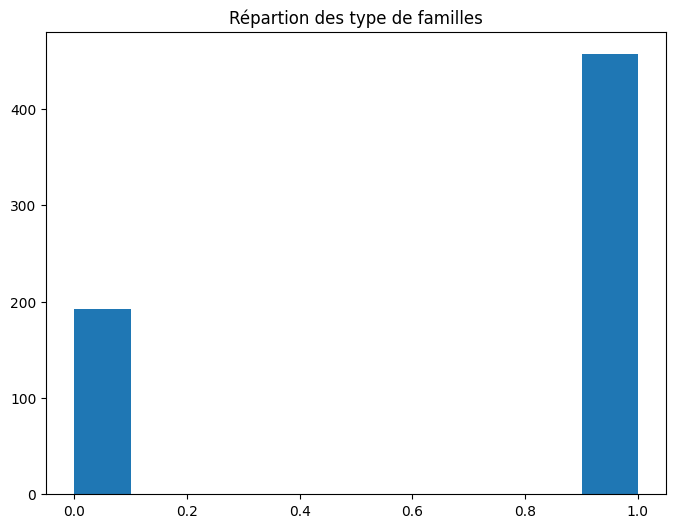

In [ ]:
# histogramme pour représenter la répartion de chaque taille de famille

plt.figure(figsize=(8,6))
plt.hist(df['famsize'], bins=10)
plt.title('Répartion des type de familles')
plt.show()

Classification

In [ ]:
print(X_train.dtypes)

age                  float64
famsize              float64
Medu                 float64
Fedu                 float64
Mjob                 float64
Fjob                 float64
traveltime           float64
studytime            float64
failures             float64
famrel               float64
freetime             float64
goout                float64
Dalc                 float64
Walc                 float64
health               float64
absences             float64
G1                   float64
G2                   float64
school_GP            float64
school_MS            float64
romantic_no          float64
romantic_yes         float64
internet_no          float64
internet_yes         float64
nursery_no           float64
nursery_yes          float64
activities_no        float64
activities_yes       float64
higher_no            float64
higher_yes           float64
paid_no              float64
paid_yes             float64
famsup_no            float64
famsup_yes           float64
schoolsup_no  

Modélisation et Évaluation

In [ ]:
# importation des métriques et des algorithmes.
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

In [ ]:
# Régression logistique
clf = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# validation croisée simple pour optimiser le modèle de Régression logistique
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_Scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='f1')
print("Validation croisée : ", cv_Scores)
print("Moyenne F1-Score :", cv_Scores.mean())

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("Classification (Logistique regression)")
print("Précision: ", precision_score(y_test, pred))
print("Rappel: ", recall_score(y_test, pred))
print("F1_score", f1_score(y_test, pred))
print("accuracy_score", accuracy_score(y_test, pred))
cm_clf = confusion_matrix(y_test, pred)
print("Matrice de confusion :\n", cm_clf)

Validation croisée :  [0.8969697  0.86896552 0.93506494 0.88732394 0.94736842]
Moyenne F1-Score : 0.9071385027981229
Classification (Logistique regression)
Précision:  0.9459459459459459
Rappel:  0.7608695652173914
F1_score 0.8433734939759037
accuracy_score 0.7607361963190185
Matrice de confusion :
 [[ 19   6]
 [ 33 105]]


In [ ]:
# Arbre de décision
Tree = DecisionTreeClassifier(random_state=42)

# validation croisée simple pour optimiser le modèle d'arbre de décision
kf2 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_Scores2 = cross_val_score(Tree, X_train, y_train, cv=kf2, scoring='f1')
print("Validation croisée : ", cv_Scores2)
print("Moyenne F1-Score :", cv_Scores2.mean())

Tree.fit(X_train, y_train)

tree_pred = Tree.predict(X_test)

print("Classification (DecisionTree): ")
print("Précision: ", precision_score(y_test, tree_pred))
print("Rappel: ", recall_score(y_test, tree_pred))
print("F1_score", f1_score(y_test, tree_pred))
print("accuracy_score", accuracy_score(y_test, tree_pred))
cm_tree =confusion_matrix(y_test, tree_pred)
print("Matrice de confusion :\n", cm_tree)

Validation croisée :  [0.93641618 0.92307692 0.94936709 0.92810458 0.94797688]
Moyenne F1-Score : 0.9369883300863464
Classification (DecisionTree): 
Précision:  0.9424460431654677
Rappel:  0.9492753623188406
F1_score 0.9458483754512635
accuracy_score 0.9079754601226994
Matrice de confusion :
 [[ 17   8]
 [  7 131]]


In [ ]:
#K-Nearest Neighbors (K-NN)
knn = KNeighborsClassifier()

# validation croisée simple pour optimiser le modèle K-Nearest Neighbors
kf3 = KFold(n_splits=5, shuffle=True, random_state=42)
cv_Scores3 = cross_val_score(knn, X_train, y_train, cv=kf3, scoring='f1')
print("Validation croisée : ", cv_Scores3)
print("Moyenne F1-Score :", cv_Scores3.mean())

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("K-Nearest Neighbors :")
print("Précision: ", precision_score(y_test, knn_pred))
print("Rappel: ", recall_score(y_test, knn_pred))
print("F1_score", f1_score(y_test, knn_pred))
print("accuracy_score", accuracy_score(y_test, knn_pred))
cm_knn = confusion_matrix(y_test, knn_pred)
print("Matrice de confusion :\n", cm_knn)

Validation croisée :  [0.95604396 0.89411765 0.9122807  0.90588235 0.93333333]
Moyenne F1-Score : 0.9203315982263349
K-Nearest Neighbors :
Précision:  0.8590604026845637
Rappel:  0.927536231884058
F1_score 0.89198606271777
accuracy_score 0.8098159509202454
Matrice de confusion :
 [[  4  21]
 [ 10 128]]


- Optimisation : 
Implémentations de diverses GridSearchCV pour identifier les meilleurs hyperparamètres de nos trois modèles.

In [ ]:
# GridSearchCV

# Grille adaptée à LogisticRegression
# Remarque : 'liblinear' gère l1 et l2 ; on évite elasticnet (nécessite 'saga')
param_grid = {
    "solver": ["liblinear"],
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100]
}
 
# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 
# Scoring multi-métriques (noms corrects)
scoring = {
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "accuracy": "accuracy"
}
 
# GridSearchCV — on refit selon le rappel (priorité au rappel)
grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=scoring,
    refit="recall",   # très important: doit correspondre à une clé de 'scoring'
    cv=cv,
    n_jobs=-1,
    verbose=2
)
 
# Entraînement
grid.fit(X_train, y_train)
 
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score CV (rappel) :", grid.best_score_)
print("Meilleur score de test : ", grid.best_estimator_.score(X_test, y_test))
 

# Modèle final optimisé
best_model_log = grid.best_estimator_
 
# Évaluation sur le test
y_pred = best_model_log.predict(X_test)
 
print("Accuracy (test) :", accuracy_score(y_test, y_pred))
print("Précision (test):", precision_score(y_test, y_pred))
print("Rappel (test)   :", recall_score(y_test, y_pred))
print("F1-score (test) :", f1_score(y_test, y_pred))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Meilleur score CV (rappel) : 0.9050837496326771
Meilleur score de test :  0.852760736196319
Accuracy (test) : 0.852760736196319
Précision (test): 0.9596774193548387
Rappel (test)   : 0.8623188405797102
F1-score (test) : 0.9083969465648855
Matrice de confusion :
 [[ 20   5]
 [ 19 119]]


Expérience avec le modèle de logistique de régression

In [ ]:
import joblib
#joblib.dump(best_model_log, "./models/modele_logistique.pkl")


FileNotFoundError: [Errno 2] No such file or directory: './models/modele_logistique.pkl'

In [ ]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

In [ ]:

mlflow.set_experiment("teste du modèle de logistique de régression local")

2025/11/19 09:24:26 INFO mlflow.tracking.fluent: Experiment with name 'teste du modèle de logistique de régression local' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/380795370117169516', creation_time=1763562266935, experiment_id='380795370117169516', last_update_time=1763562266935, lifecycle_stage='active', name='teste du modèle de logistique de régression local', tags={}>

In [ ]:
with mlflow.start_run(run_name='Logistique de regression - Optimisé'):
    mlflow.log_params(best_model_log.get_params())

    #Enregistrer les métriques de performances
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    })
    #mlflow.log_artifact("modele_logistique.pkl")
    mlflow.sklearn.log_model(best_model_log, artifact_path="logistique_regression_model")

2025/11/19 09:24:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/19 09:24:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistique de regression - Optimisé at: http://127.0.0.1:5000/#/experiments/380795370117169516/runs/039acae83a664a598a47cf0bca014801
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/380795370117169516


In [ ]:
mlflow.set_tracking_uri(uri="https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow")
mlflow.set_experiment("modèle logistique de régression sur dagshub")

2025/11/19 09:24:37 INFO mlflow.tracking.fluent: Experiment with name 'modèle logistique de régression sur dagshub' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/10bcd19b56b34fab863f303e6f2786af', creation_time=1763562277501, experiment_id='6', last_update_time=1763562277501, lifecycle_stage='active', name='modèle logistique de régression sur dagshub', tags={}>

In [ ]:
with mlflow.start_run(run_name='Logistique de regression - Optimisé'):
    mlflow.log_params(best_model_log.get_params())

    #Enregistrer les métriques de performances
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    })
    mlflow.log_artifact("modele_logistique.pkl")
    #mlflow.sklearn.log_model(best_model_log, artifact_path="logistique_regression_model")

🏃 View run Logistique de regression - Optimisé at: https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow/#/experiments/6/runs/849fa971096443abb0fc11098991552c
🧪 View experiment at: https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow/#/experiments/6


In [ ]:
# Grille adaptée à DecisionTreeClassifier

pipe_tree = Pipeline(steps=[
    ("tree", DecisionTreeClassifier())
])
param_grid = {
    "tree__max_depth": [10, 20, 25, 30, 35, 50],
    "tree__class_weight": [None, "balanced"],
    "tree__min_samples_split": [2, 4, 8, 12]
}
 
# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 
# Scoring multi-métriques (noms corrects)
scoring = {
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "accuracy": "accuracy"
}
 
# GridSearchCV — on refit selon le rappel (priorité au rappel)
grid = GridSearchCV(
    estimator=pipe_tree,
    param_grid=param_grid,
    scoring=scoring,
    refit="recall",   # très important: doit correspondre à une clé de 'scoring'
    cv=cv,
    n_jobs=-1,
    verbose=2
)
 
# Entraînement
grid.fit(X_train, y_train)
 
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score CV (rappel) :", grid.best_score_)
print("Meilleur score de test : ", grid.best_estimator_.score(X_test, y_test))
 

# Modèle tree optimisé
best_model_tree = grid.best_estimator_
 
# Évaluation sur le test
y_pred_tree = best_model_tree.predict(X_test)
 
print("Accuracy (test) :", accuracy_score(y_test, y_pred_tree))
print("Précision (test):", precision_score(y_test, y_pred_tree))
print("Rappel (test)   :", recall_score(y_test, y_pred_tree))
print("F1-score (test) :", f1_score(y_test, y_pred_tree))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_tree))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs paramètres : {'tree__class_weight': 'balanced', 'tree__max_depth': 10, 'tree__min_samples_split': 2}
Meilleur score CV (rappel) : 0.9464002350866881
Meilleur score de test :  0.8834355828220859
Accuracy (test) : 0.8834355828220859
Précision (test): 0.9343065693430657
Rappel (test)   : 0.927536231884058
F1-score (test) : 0.9309090909090909
Matrice de confusion :
 [[ 16   9]
 [ 10 128]]


In [ ]:
joblib.dump(best_model_tree, "./models/modele_tree.pkl")

['modele_tree.pkl']

In [ ]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

mlflow.set_experiment("exprience avec le modèle arbre de décision locale")

with mlflow.start_run(run_name='Arbre de Décision - Optimisé'):
    mlflow.log_params(best_model_tree.get_params())

    #Enregistrer les métriques de performances

    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred_tree),
        "precision": precision_score(y_test, y_pred_tree),
        "recall": recall_score(y_test, y_pred_tree),
        "f1_score": f1_score(y_test, y_pred_tree)
    })
    #mlflow.log_artifact("modele_tree.pkl")
    mlflow.sklearn.log_model(best_model_tree, artifact_path="decision_tree_model")

2025/11/19 09:31:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/19 09:31:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Arbre de Décision - Optimisé at: http://127.0.0.1:5000/#/experiments/144134378481529242/runs/d846f773316d408abc7d6c8d11e66122
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/144134378481529242


In [ ]:
mlflow.set_tracking_uri(uri="https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow")

mlflow.set_experiment("exprience avec le modèle arbre de décision sur dagshub")

with mlflow.start_run(run_name='Arbre de Décision - Optimisé'):
    mlflow.log_params(best_model_tree.get_params())

    #Enregistrer les métriques de performances

    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred_tree),
        "precision": precision_score(y_test, y_pred_tree),
        "recall": recall_score(y_test, y_pred_tree),
        "f1_score": f1_score(y_test, y_pred_tree)
    })
    mlflow.log_artifact("modele_tree.pkl")

🏃 View run Arbre de Décision - Optimisé at: https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow/#/experiments/7/runs/6a566cc7f0f84d5d9d462f238eb56419
🧪 View experiment at: https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow/#/experiments/7


In [ ]:
# 1) Pipeline : Standardisation indispensable pour k-NN
# Pour le modèle KNeighborsClassifier, il faut normaliser les données avec StandardScaler.
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])
 
# 2) Grille d'hyperparamètres (adapter au besoin)
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11]
}


# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 
# Scoring multi-métriques (noms corrects)
scoring = {
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "accuracy": "accuracy"
}
 
# GridSearchCV — on refit selon le rappel (priorité au rappel)
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit="recall",   # très important: doit correspondre à une clé de 'scoring'
    cv=cv,
    n_jobs=-1,
    verbose=2
)
 
# Entraînement
grid.fit(X_train, y_train)
 
print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score CV (rappel) :", grid.best_score_)
print("Meilleur score de test : ", grid.best_estimator_.score(X_test, y_test))
 
# Modèle final optimisé
best_model_knn = grid.best_estimator_
 
# Évaluation sur le test
y_pred_knn = best_model_knn.predict(X_test)
 
print("Accuracy (test) :", accuracy_score(y_test, y_pred_knn))
print("Précision (test):", precision_score(y_test, y_pred_knn))
print("Rappel (test)   :", recall_score(y_test, y_pred_knn))
print("F1-score (test) :", f1_score(y_test, y_pred_knn))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Meilleurs paramètres : {'knn__n_neighbors': 11}
Meilleur score CV (rappel) : 0.9951807228915662
Meilleur score de test :  0.8282208588957055
Accuracy (test) : 0.8282208588957055
Précision (test): 0.8618421052631579
Rappel (test)   : 0.9492753623188406
F1-score (test) : 0.903448275862069
Matrice de confusion :
 [[  4  21]
 [  7 131]]


In [ ]:
joblib.dump(best_model_knn, "./models/modele_KNN.pkl")

['modele_KNN.pkl']

In [ ]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

mlflow.set_experiment("exprience avec le modèle Kneighbors classifier locale")

2025/11/19 09:29:42 INFO mlflow.tracking.fluent: Experiment with name 'exprience avec le modèle Kneighbors classifier locale' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/530138807839911169', creation_time=1763562582505, experiment_id='530138807839911169', last_update_time=1763562582505, lifecycle_stage='active', name='exprience avec le modèle Kneighbors classifier locale', tags={}>

In [ ]:
with mlflow.start_run(run_name='KNeighborsClassifier - Optimisé'):
    mlflow.log_params(best_model_knn.get_params())

    #Enregistrer les métriques de performances
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred_knn),
        "precision": precision_score(y_test, y_pred_knn),
        "recall": recall_score(y_test, y_pred_knn),
        "f1_score": f1_score(y_test, y_pred_knn)
    })
    mlflow.sklearn.log_model(best_model_knn, artifact_path="knn_model")

2025/11/19 09:29:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/19 09:29:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KNeighborsClassifier - Optimisé at: http://127.0.0.1:5000/#/experiments/530138807839911169/runs/d16beaed0f78415eaf18a80b879f0d17
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530138807839911169


In [ ]:
mlflow.set_tracking_uri("https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow")

mlflow.set_experiment("expérience avec le modèle KNeighborsClassifier sur dagshub")

2025/11/19 09:30:06 INFO mlflow.tracking.fluent: Experiment with name 'expérience avec le modèle KNeighborsClassifier sur dagshub' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/1c618123f17240f7b1d873b2ded7cfbe', creation_time=1763562605971, experiment_id='8', last_update_time=1763562605971, lifecycle_stage='active', name='expérience avec le modèle KNeighborsClassifier sur dagshub', tags={}>

In [ ]:
with mlflow.start_run(run_name='KNeighborsClassifier - Optimisé'):
    mlflow.log_params(best_model_knn.get_params())

    #Enregistrer les métriques de performances
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred_knn),
        "precision": precision_score(y_test, y_pred_knn),
        "recall": recall_score(y_test, y_pred_knn),
        "f1_score": f1_score(y_test, y_pred_knn)
    })
    mlflow.log_artifact("modele_KNN.pkl")

🏃 View run KNeighborsClassifier - Optimisé at: https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow/#/experiments/8/runs/6929ffefcd634188a81fb17bd35cf5f9
🧪 View experiment at: https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow/#/experiments/8


In [ ]:
mlflow.get_tracking_uri()

'https://dagshub.com/2675781/ProjetIA_mlflow_dagshub_2025.mlflow'

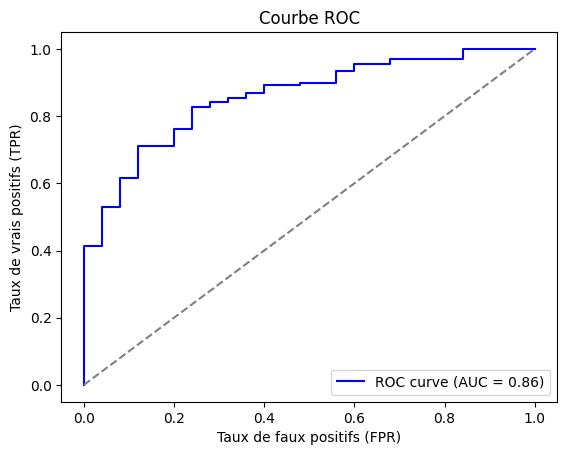

In [ ]:
# Courbe roc pour évaluer les vrais positifs.
from sklearn.metrics import roc_curve, auc

#probabilités pour roc_curve
proba = clf.predict_proba(X_test)[:, 1]
# Calculer les valeurs de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, proba)
roc_auc = auc(fpr, tpr)

#Création de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0,1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

Comparaison des modèles

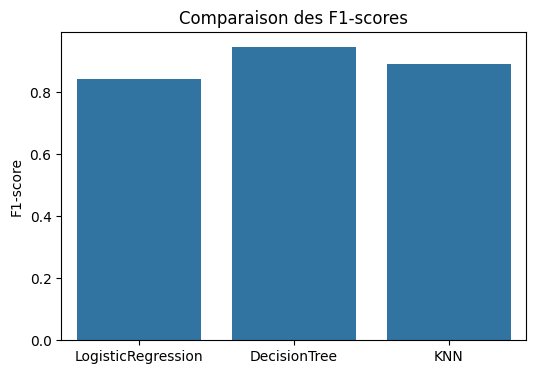

In [ ]:
# comparer les modèles
scores = {
    "LogisticRegression": f1_score(y_test, pred),
    "DecisionTree": f1_score(y_test, tree_pred),
    "KNN": f1_score(y_test, knn_pred)
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title("Comparaison des F1-scores")
plt.ylabel("F1-score")
plt.show()

#Le f1-score combine les métriques précision et rappel, alors on le calcul pour savoir pour les deux objectifs lequel des modèles est le meilleur.

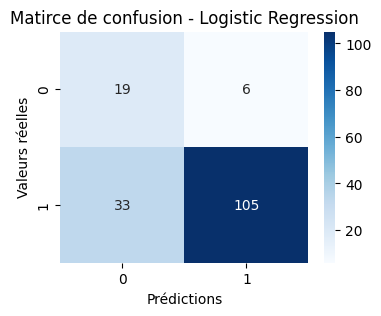

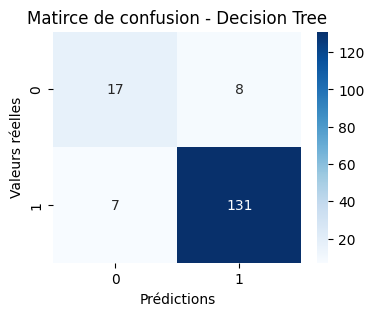

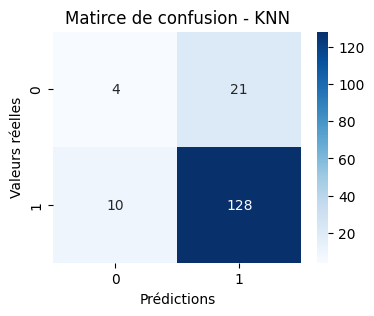

In [ ]:
models = {'Logistic Regression': cm_clf, 'Decision Tree': cm_tree, 'KNN': cm_knn}

for name, cm in models.items():
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matirce de confusion - {name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Valeurs réelles")
    plt.show()

In [ ]:
# Affichage des faux négatifs pour chaque modèles
false_negatives_clf = X_test[(y_test == 1) & (pred == 0)]
print("Nombre de faux négatifs de notre modèle de Logistique de régression:", len(false_negatives_clf))

# Il y a 33 étudiants qui ne sont pas détectés par notre modèle de Logistique de régression.

false_negatives_tree = X_test[(y_test == 1) & (tree_pred == 0)]
print("Nombre de faux négatifs de notre modèle d'arbre de décision':", len(false_negatives_tree))

# 7 étudiants ne sont pas détectés par notre modèle d'arbre de décision.

false_negatives_knn = X_test[(y_test == 1) & (knn_pred == 0)]
print("Nombre de faux négatifs de notre modèle de knn':", len(false_negatives_knn))

# 10 étudiants ne sont pas détectés par le modèle knn

Nombre de faux négatifs de notre modèle de Logistique de régression: 33
Nombre de faux négatifs de notre modèle d'arbre de décision': 7
Nombre de faux négatifs de notre modèle de knn': 10


In [ ]:
# représentation des faux négatifs et des f1_scores trouvés par chacun des modèles
results = pd.DataFrame({
    'Modèle': ['Logistic Regression', 'Decision Tree', 'KNN'],
    'F1-Score': [f1_score(y_test, pred), f1_score(y_test, tree_pred), f1_score(y_test, knn_pred)],
    'Faux négatifs': [len(false_negatives_clf), len(false_negatives_tree), len(false_negatives_knn)]
})
print(results)

                Modèle  F1-Score  Faux négatifs
0  Logistic Regression  0.843373             33
1        Decision Tree  0.945848              7
2                  KNN  0.891986             10


In [ ]:
# Sauvegarde du modèle final
import joblib

# Sauvegarde du modèle optimisé d'arbre de décision
joblib.dump(best_model_tree, 'modele_tree.pkl')
print("Le modèle optimisé a été sauvegardé dans le fichier 'modeleFinal.pkl'.")

Le modèle optimisé a été sauvegardé dans le fichier 'modeleFinal.pkl'.
